In [226]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , PolynomialFeatures
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
import plotly.express as px # Interactive Data Visualization
from jupyterthemes import jtplot # Jupyter Notebook Theme
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.

# Load the dataset
car_df = pd.read_csv("merged_new_cleaned.csv")
# car_df = car_df[car_df['price'] > 1000]

# Handle missing values if any
car_df = car_df.dropna()

# car_df['year'] = 2024 - car_df['year']  # Assuming the current year is 2023
# car_df = car_df.drop('year', axis=1)

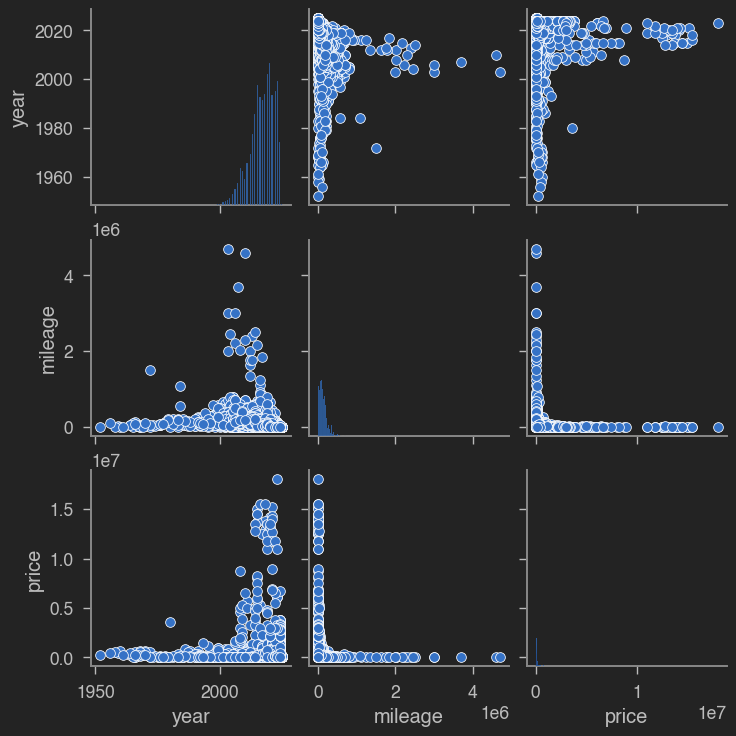

In [227]:
sns.pairplot(data = car_df) 


In [228]:
fig = px.histogram(car_df, x="brand",
                   labels={"brand": "Manufacturer"},
                   title="TOTAL OF BRANDS",
                   text_auto=True,  # Automatically add text labels
                   color_discrete_sequence=["maroon"])

fig.show()

In [229]:
fig = px.histogram(car_df, x="fuel",
                   labels={"fuel": "fuel"},
                   title="FUEL OF THE CAR",
                   text_auto=True,  # Automatically add text labels
                   )

fig.show()

In [230]:
fig = px.histogram(car_df, x="transmission",
                   labels={"transmission": "transmission"},
                   title="TRANSMISSION OF THE CARS",
                   text_auto=True,  # Automatically add text labels
                   color_discrete_sequence=["brown"])

fig.show()

In [231]:
fig = px.histogram(car_df, x="year",
                   labels={"year": "year"},
                   title="TOTAL CARS BY YEAR",
                   text_auto=True  # Automatically add text labels
                   )
fig.update_layout(bargap=0.2)  # Adjust the value as needed (0.2 is an example)

fig.show()

In [232]:
fig = px.histogram(car_df, x = "brand",
                  color = "fuel",
                  labels = {"brand":"Manufacturer"},
                  title = "BRAND AND FUEL OF THE CAR",
                  opacity = 1)
                  
fig.show()

In [233]:
# Encode categorical variables
label_encoders = {}
for column in ['brand', 'model', 'fuel', 'transmission']:
    le = LabelEncoder()
    car_df[column] = le.fit_transform(car_df[column])
    label_encoders[column] = le

# Split the data into features and target
X = car_df.drop('price', axis=1)
y = car_df['price']

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [235]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [236]:
# Obtain the correlation matrix
numeric_car_df = car_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_car_df.corr()

<Axes: >

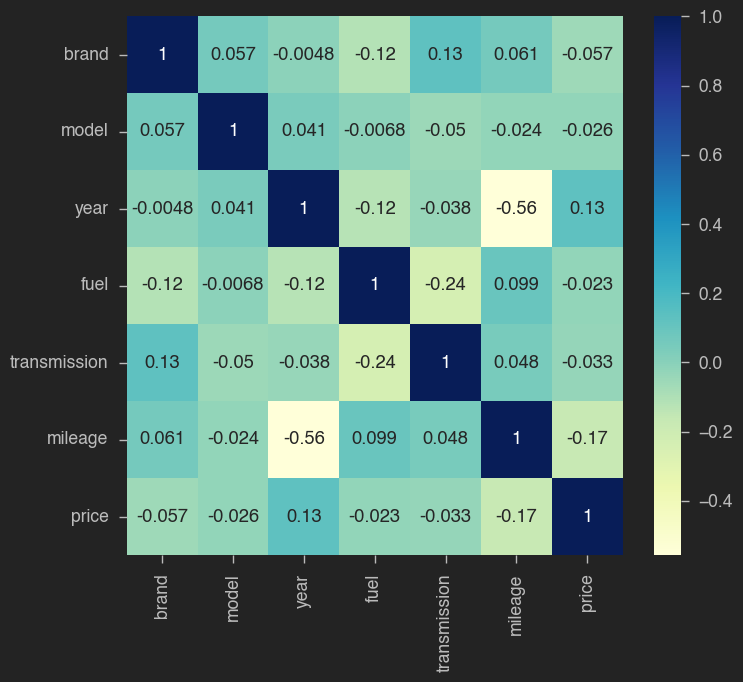

In [237]:
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot = True)

In [238]:
LinearRegression_model= LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [239]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.03141335755198238

In [240]:
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [241]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.5928797819533116

In [242]:
RandomForest_model = RandomForestRegressor(n_estimators= 5, max_depth= 5)
RandomForest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=5)

In [243]:
accuracy_RandomForest= RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.25545258811316485

In [244]:
modelx = xgb.XGBRegressor(
    n_estimators=1000, # the number of trees
    objective='reg:squarederror', # the objective function
    booster='gbtree', # the booster type
    # num_parallel_tree=100,
    learning_rate=0.1, # the step size shrinkage used to prevent overfitting
    max_depth=6 # the maximum depth of each tree
)
modelx.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [245]:
accuracy_XGBoost = modelx.score(X_test, y_test)
accuracy_XGBoost

0.7240159511566162

## Fine tune the model 

In [246]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}
grid_search = GridSearchCV(estimator=modelx, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0....
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=1000,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 500, 1000],
                         'reg_alpha': [0, 0.1, 1], 'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [247]:
# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters and early stopping
modelxg = xgb.XGBRegressor(**best_params, objective='reg:squarederror', booster='gbtree')
modelxg.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-rmse:494865.41943
[1]	validation_0-rmse:478421.39727
[2]	validation_0-rmse:466822.51969
[3]	validation_0-rmse:452557.66032
[4]	validation_0-rmse:435686.53458
[5]	validation_0-rmse:428847.81029
[6]	validation_0-rmse:418354.55856
[7]	validation_0-rmse:413202.13114
[8]	validation_0-rmse:407322.07801
[9]	validation_0-rmse:401323.55591
[10]	validation_0-rmse:394439.94890
[11]	validation_0-rmse:388290.97679
[12]	validation_0-rmse:383309.37152
[13]	validation_0-rmse:380710.18943
[14]	validation_0-rmse:371667.39311
[15]	validation_0-rmse:364121.61321
[16]	validation_0-rmse:357360.62446
[17]	validation_0-rmse:355311.74702
[18]	validation_0-rmse:353884.45625
[19]	validation_0-rmse:350953.10400
[20]	validation_0-rmse:345103.14287
[21]	validation_0-rmse:343575.13633
[22]	validation_0-rmse:341455.09443
[23]	validation_0-rmse:339592.13241
[24]	validation_0-rmse:336237.84105
[25]	validation_0-rmse:332919.69333
[26]	validation_0-rmse:330304.18596
[27]	validation_0-rmse:326444.00608
[2

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [248]:
accuracy_tunned_XGBoost = modelxg.score(X_test, y_test)
accuracy_tunned_XGBoost

0.744780421257019

[Text(0.5, 1.0, 'Linear Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

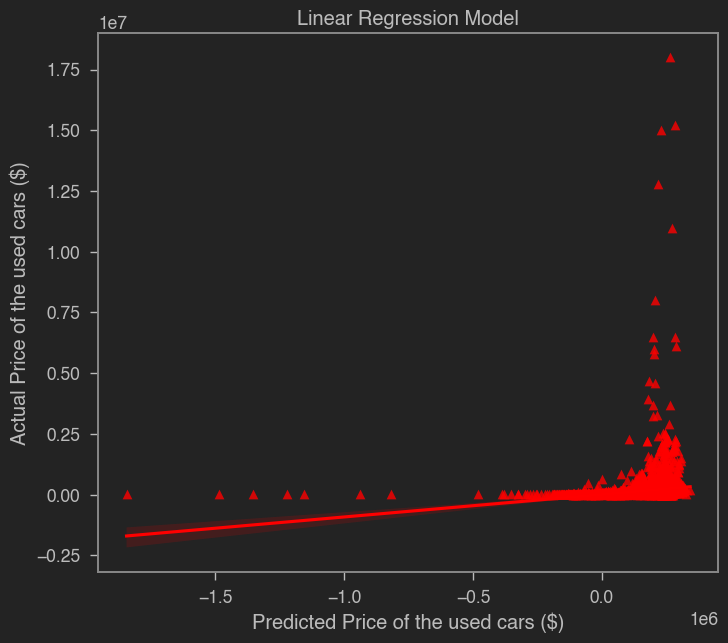

In [249]:
y_predict_linear = LinearRegression_model.predict(X_test)

fig = sns.regplot(x=y_predict_linear, y=y_test, color='red', marker='^')
fig.set(title="Linear Regression Model", xlabel="Predicted Price of the used cars ($)", ylabel="Actual Price of the used cars ($)")

In [250]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_linear)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_linear)
MAE= mean_absolute_error(y_test, y_predict_linear)
r2= r2_score(y_test, y_predict_linear)

# MSE : Mean Squared Error (MSE) is the mean of the squared errors which is the average squared difference between the estimated values and the actual value
# RMSE : Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors
# MAE : Mean Absolute Error (MAE) is the mean of the absolute value of the errors
# THE R-SQUARED : is a statistical measure of how close the data are to the fitted regression line
# THE R-SQUARED : 

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 505500.801 
MSE = 255531059548.92905 
MAE = 134584.8570635709 
R2 = 0.03141335755198238


[Text(0.5, 1.0, 'Random Forest Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

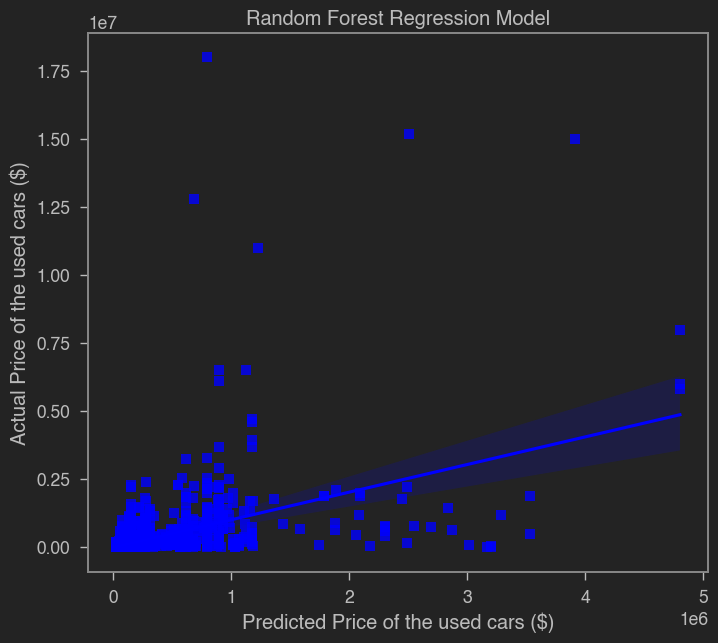

In [251]:
y_predict_RandomForest = RandomForest_model.predict(X_test)

fig = sns.regplot(x=y_predict_RandomForest, y=y_test, color = 'blue', marker = "s")
fig.set(title = "Random Forest Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel= "Actual Price of the used cars ($)")

In [252]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_RandomForest)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_RandomForest)
MAE= mean_absolute_error(y_test, y_predict_RandomForest)
r2= r2_score(y_test, y_predict_RandomForest)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 443199.018 
MSE = 196425369405.26364 
MAE = 97127.1859150035 
R2 = 0.25545258811316485


[Text(0.5, 1.0, 'XGBoost Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

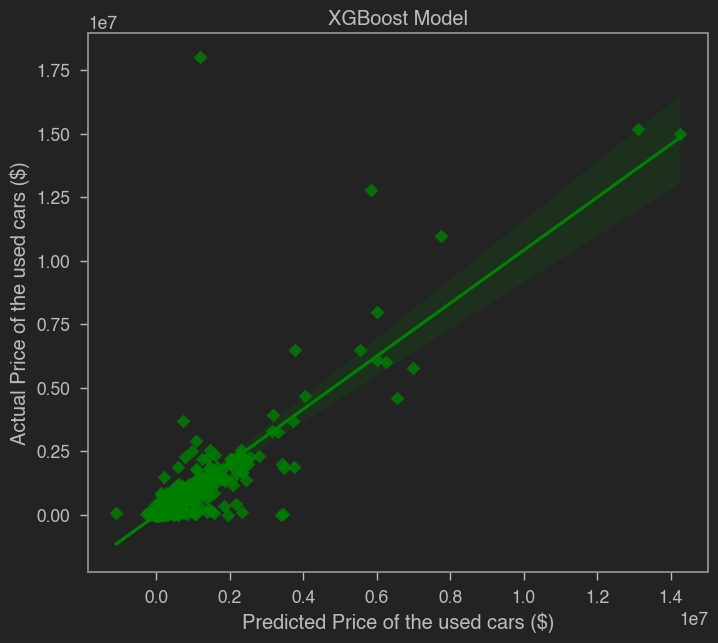

In [258]:
y_predict_XGBoost = modelx.predict(X_test)

fig = sns.regplot(x=y_predict_XGBoost, y=y_test, color = 'green', marker = "D")
fig.set(title = "XGBoost Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

[Text(0.5, 1.0, 'XGBoost Model fine tunned'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

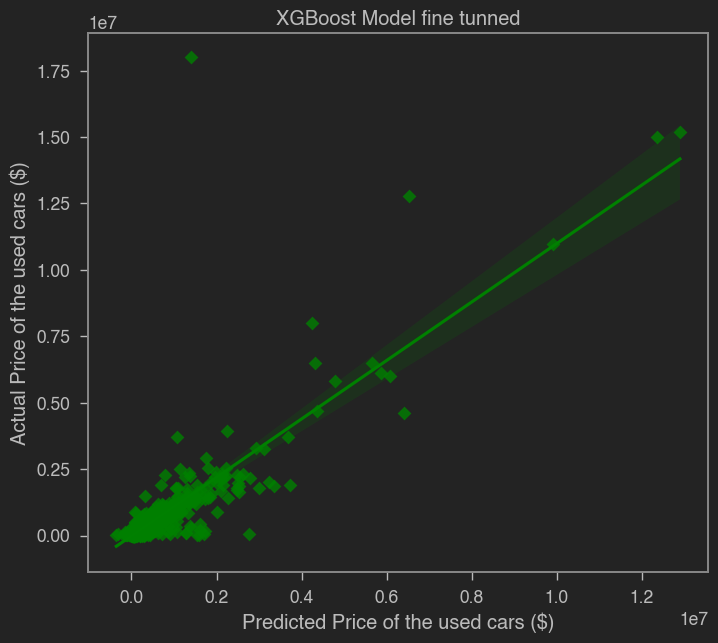

In [259]:
y_predict_XGBoost = modelxg.predict(X_test)

fig = sns.regplot(x=y_predict_XGBoost, y=y_test, color = 'green', marker = "D")
fig.set(title = "XGBoost Model fine tunned", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [254]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_XGBoost)), ".3f"))
MSE = mean_squared_error(y_test, y_predict_XGBoost)
MAE = mean_absolute_error(y_test, y_predict_XGBoost)
r2 = r2_score(y_test, y_predict_XGBoost)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 269832.722 
MSE = 72809697822.12396 
MAE = 39078.406548922976 
R2 = 0.7240159511566162


In [265]:
# save the model to disk
import pickle
filename = 'finalized_model_fine_tunned.sav'
pickle.dump(modelxg, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [294]:
# Function to predict the price of a specific car model
def predict_price(brand, model, year, fuel, transmission, mileage):
    # Encode the input features
    brand_encoded = label_encoders['brand'].transform([brand])[0]
    model_encoded = label_encoders['model'].transform([model])[0]
    fuel_encoded = label_encoders['fuel'].transform([fuel])[0]
    transmission_encoded = label_encoders['transmission'].transform([transmission])[0]

    # Create a DataFrame for the input features
    input_data = pd.DataFrame({
        'brand': [brand_encoded],
        'model': [model_encoded],
        'year': [year],
        'fuel': [fuel_encoded],
        'transmission': [transmission_encoded],
        'mileage': [mileage]
    })
    
    # Predict the price
    predicted_price = loaded_model.predict(input_data)
    return predicted_price[0]

# Example usage
predicted_price = predict_price('Toyota', 'Camry', 2020, 'Petrol', 'Automatic', 138000 )
print(f"The predicted price is: {round(predicted_price)}")

The predicted price is: 64530


In [308]:
# get the some simples of the data from the dataset and compare the predicted price with the actual price
sample = [
    {
        'brand': 'Nissan',
        'model': 'Patrol',
        'year': 2022,
        'fuel': 'Petrol',
        'transmission': 'Automatic',
        'mileage': 27000,
        'price': 260000
    },
    {
        'brand': 'Nissan',
        'model': 'Altima',
        'year': 2018,
        'fuel': 'Petrol',
        'transmission': 'Automatic',
        'mileage': 180000,
        'price': 48000
    },
    {
        'brand': 'Toyota',
        'model': 'Camry',
        'year': 2020,
        'fuel': 'Petrol',
        'transmission': 'Automatic',
        'mileage': 138000,
        'price': 45000
    },
    {
        'brand': 'Toyota',
        'model': 'Camry',
        'year': 2018,
        'fuel': 'Petrol',
        'transmission': 'Automatic',
        'mileage': 97000,
        'price': 68000
    },
    {
        'brand': 'Toyota',
        'model': 'Corolla',
        'year': 2021,
        'fuel': 'Petrol',
        'transmission': 'Automatic',
        'mileage': 90000,
        'price': 51900
    },
    {
        'brand': 'Toyota',
        'model': 'Corolla',
        'year': 2018,
        'fuel': 'Petrol',
        'transmission': 'Automatic',
        'mileage': 125000,
        'price': 39500
    }
]


sample = pd.DataFrame(sample)


# predict using the sample data and compare the predicted price with the actual price

# transform the categorical data to numerical data
for column in ['brand', 'model', 'fuel', 'transmission']:
    sample[column] = label_encoders[column].transform(sample[column])

# predict the price
sample['predicted_price'] = loaded_model.predict(sample.drop('price', axis=1))
sample['error'] = sample['price'] - sample['predicted_price']
sample['error_percentage'] = round((sample['error'].abs() / sample['price']) * 100) 

# transform the numerical data back to categorical data
for column in ['brand', 'model', 'fuel', 'transmission']:
    sample[column] = label_encoders[column].inverse_transform(sample[column])

sample

,brand,model,year,fuel,transmission,mileage,price,predicted_price,error,error_percentage
0,Nissan,Patrol,2022,Petrol,Automatic,27000,260000,214823.593750,45176.406250,17.0
1,Nissan,Altima,2018,Petrol,Automatic,180000,48000,36794.000000,11206.000000,23.0
2,Toyota,Camry,2020,Petrol,Automatic,138000,45000,64530.328125,-19530.328125,43.0
3,Toyota,Camry,2018,Petrol,Automatic,97000,68000,56048.187500,11951.812500,18.0
4,Toyota,Corolla,2021,Petrol,Automatic,90000,51900,72506.945312,-20606.945312,40.0
5,Toyota,Corolla,2018,Petrol,Automatic,125000,39500,45900.097656,-6400.097656,16.0
